# Feldman-Cousins Confidence Interval Tutorial

Anil Kumar | anil.kumar@desy.de | 3 July, 2024

Ref.: A Unified Approach to the Classical Statistical Analysis of Small Signals, Gary J. Feldman, Robert D. Cousins, [PRD 57 (1998) 3873-3889](https://doi.org/10.1103/PhysRevD.57.3873), [arXiv:physics/9711021](https://arxiv.org/abs/physics/9711021v2)

Suppose that we wish to make an inference about a parameter $\mu$ whose true value $\mu_t$ is unknown. Assume that we do this by making a single measurement of an observable $x$ such that the probability density function (pdf) for obtaining the value $x$ depends on the unknown parameter $\mu$ in a known way: we call this pdf $P(x|\mu)$. Now suppose that the single measurement of $x$ yields the value $x_0$. One substitutes this value of $x$ into $P(x|\mu)$ to obtain $P(x_0|\mu)$, known as the likelihood function, which we denote as $\mathcal{L}(x_0|\mu)$.

In the frequentist approach, we obtain a confidence interval $[\mu_1, \mu_2]$, which is a member of a set, such that the set has the property that 

\begin{equation}
P(\mu \in [\mu_1, \mu_2] = \alpha.
\end{equation}

Here $\mu_1$ and $\mu_2$ are functions of the measured $x$, and this equation refers to the varying confidence intervals $[\mu_1, \mu_2]$ from an ensemble of experiments with fixed $\mu$. For a set of confidence intervals, this equation is true for every allowed $\mu$. Thus, in particular, the intervals contain the fixed unknown $\mu_t$ in a fraction $\alpha$ of experiments. 

### Example: Gaussian with Boundary at Origin

Consider the observable $x$ which is simply the measured value of $\mu$ in an experiment with a Gaussian resolution function with known fixed rms deviation $\sigma = 1$

\begin{equation}
P(x|\mu) = \frac{1}{\sqrt{2\pi}} \exp{\left(-(x-\mu)^2/2\right)}
\end{equation}

We consider an interesting case where only non-negative values for $\mu$ are physically allowed. For example, if $\mu$ is a mass. Therefore, the graph does not exist for $\mu < 0$.

In this tutorial, we will study the following type of confidence intervals:
- Central confidence interval
- Upper confidence limit
- Confidence interval based on Flip-flopping policy
- Feldmann-Cousins confidence interval

In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})


# Gaussian distribution with unit $\sigma$

Here, we plot the Gaussian pdf $P(x|\mu)$ as a function of $x$ for a given value of $\mu$ with known fixed rms deviation $\sigma = 1$

\begin{equation}
P(x|\mu) = \frac{1}{\sqrt{2\pi}} \exp{\left(-(x-\mu)^2/2\right).}
\end{equation}

We select an interval $[x_1, x_2]$ such that

\begin{equation}
P(x \in [x_1, x_2] | \mu) = \alpha.
\end{equation}

Here, we choose $\alpha$ to be 90\% confidence level (CL). We refer to the interval $[x_1, x_2]$ as the "acceptance region" or the "acceptance inteval" for this $\mu$. In order to specify uniquely the acceptance region, one must choose auxiliary criteria. One has total freedom to make this choice, if the choice is not influenced by the
data $x_0$. 

## Central confidence intervals

The choice for "central confidence intervals" is

\begin{equation}
P(x<x_1 | \mu) = P(x > x_2 | \mu) = (1 - \alpha)/2,
\end{equation}

which satisfy 

\begin{equation}
P(\mu < \mu_1) = P(\mu > \mu_2) = (1-\alpha)/2.
\end{equation}

 x1 (90% CL) =   0.36 
 x2 (90% CL) =   3.64


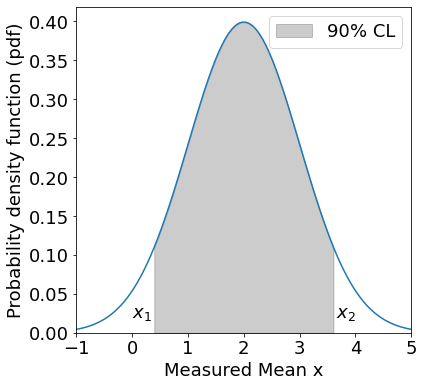

In [2]:
mean = 2                                   # mean of Gaussian pdf
std = 1                                    # sigma of Gaussian pdf
alpha = 0.9                                # 90% CL

#print(f' mean = {mean}\n sigma = {std}')

xmin, xmax = mean-3*std, mean+3*std        # we plot x over 3 sigma range
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)                 # Gaussian pdf for x with given mean and sigma

lower_CL =  0.5*(1 - alpha)                # lower limit for central confidence intervals
upper_CL =  alpha + 0.5*(1 - alpha)        # upper limit for central confidence intervals
x1 = norm.ppf(lower_CL, mean, std)         # lower limit of x for central confidence intervals
x2 = norm.ppf(upper_CL, mean, std)         # upper limit of x for central confidence intervals
print(f' x1 (90% CL) = {x1:6.2f} \n x2 (90% CL) = {x2:6.2f}')

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x, y)                             # plot Gaussian pdf
plt.fill_between(                          # shade acceptance region for 90% central CL 
        x= x, 
        y1= y, 
        where= ((x > x1) & (x < x2)),      # shade region between x1 and x2
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.text(x1, 0.02, r'$x_1$', horizontalalignment='right')
plt.text(x2, 0.02, r'$x_2$', horizontalalignment='left')
plt.xlabel('Measured Mean x')
plt.ylabel(r'Probability density function (pdf)')
plt.xlim([xmin, xmax])
plt.ylim(bottom=0)
plt.legend()
plt.show()

## Central confidence intervals

Now, we plot the parameter $\mu$ vs. the measured quantity $x$. For each value of $\mu$, one examines $P(x|\mu)$ along the horizontal line through $\mu$. We select an interval $[x_1, x_2]$ which corresponds to the confidence level of $\alpha$. The construction is complete when horizontal acceptance intervals (gray) are drawn for each value of $\mu$.

Upon performing an experiment to measure $x$ and obtaining the value $x_0$, one draws a vertical line through $x_0$ on the horizontal axis. The confidence interval is the union of all values of $\mu$ for which the corresponding horizontal interval is intercepted by the vertical line; typically this is a simply connected interval $[\mu_1, \mu_2]$.

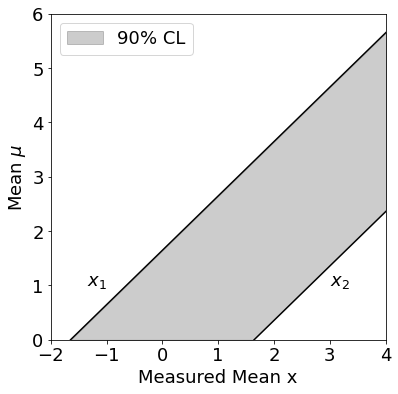

In [3]:
# Fig. 3

std = 1
alpha = 0.9

lower_CL =  0.5*(1 - alpha)              # lower limit for central confidence intervals
upper_CL =  alpha + 0.5*(1 - alpha)      # upper limit for central confidence intervals

ymin, ymax = 0, 6                        # only positive values of mean
mean = np.linspace(ymin, ymax, 100)
x1 = norm.ppf(lower_CL, mean, std)       # lower limit of x for central confidence intervals
x2 = norm.ppf(upper_CL, mean, std)       # upper limit of x for central confidence intervals

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x1, mean, color = 'k')
plt.plot(x2, mean, color = 'k')
plt.fill_between(                        # shade acceptance region for 90% central CL between x1 and x2
        x= x1, 
        y1= mean, 
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.fill_between(                       # shade acceptance region for 90% central CL between x1 and x2
        x= x2, 
        y1= mean, 
        color= "w",
        alpha= 1,
)

plt.text(-1, 1, r'$x_1$', horizontalalignment='right')
plt.text(3, 1, r'$x_2$', horizontalalignment='left')

plt.xlabel('Measured Mean x')
plt.ylabel(r'Mean $\mu$')
plt.xlim([-2, 4])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()

## Upper confidence limit


For the "upper confidence limit", the choice is 

\begin{equation}
P(x < x_1 | \mu) = 1 - \alpha
\end{equation}

which satisfy 

\begin{equation}
P(\mu > \mu_2) = 1-\alpha.
\end{equation}

 x1 (90% CL) =   0.72


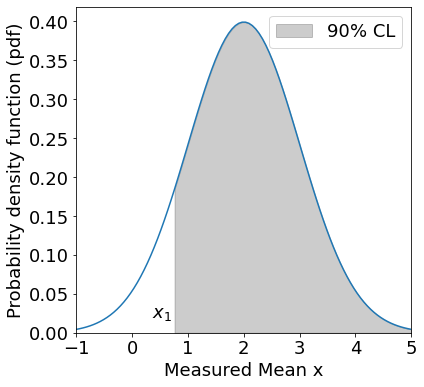

In [4]:
mean = 2
std = 1
alpha = 0.9

#print(f' mean = {mean}\n sigma = {std}')

xmin, xmax = mean-3*std, mean+3*std
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)

lower_CL =  (1 - alpha)                          # lower limit for central confidence intervals
x1 = norm.ppf(lower_CL, mean, std)               # lower limit of x for central confidence intervals
print(f' x1 (90% CL) = {x1:6.2f}')

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x, y)
plt.fill_between(
        x= x, 
        y1= y, 
        where= (x > x1),                         # shade acceptance region for 90% central CL for x > x1
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.xlabel('Measured Mean x')
plt.ylabel(r'Probability density function (pdf)')
plt.text(x1, 0.02, r'$x_1$', horizontalalignment='right')
plt.xlim([xmin, xmax])
plt.ylim(bottom=0)
plt.legend()
plt.show()

## Upper confidence limit

For each value of $\mu$, one examines $P(x|\mu)$ along the horizontal line through $\mu$ and select an interval $x_1$ which corresponds to the confidence level of $\alpha$. Here, $x_2$ can be thought of equal to infinity. 

The vertical line through the measured value $x_0$ provide upper confidence limit $\mu_2$. 

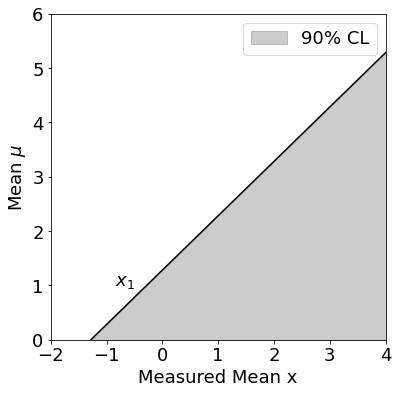

In [5]:
# Fig. 2

std = 1
alpha = 0.9

lower_CL =  (1 - alpha)                                # lower limit for central confidence intervals

ymin, ymax = 0, 6                                      # only positive values of mean
mean = np.linspace(ymin, ymax, 100)
x1 = norm.ppf(lower_CL, mean, std)                     # lower limit of x for central confidence intervals

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x1, mean, color = 'k')
plt.fill_between(                                      # shade acceptance region for 90% central CL for x > x1
        x= x1, 
        y1= mean, 
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.text(-0.5, 1, r'$x_1$', horizontalalignment='right')
plt.xlabel('Measured Mean x')
plt.ylabel(r'Mean $\mu$')
plt.xlim([-2, 4])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()

## Confidence interval based on flip-flopping

Let us suppose, for example, that Physicist X takes the following attitude in an experiment designed to measure a small quantity: “If the result $x$ is less then $3\sigma$, I will state an upper limit from the standard tables. If the result is greater than $3\sigma$, I will state a central confidence interval from the standard tables.” We call this policy “flip-flopping” based on the data. Furthermore, Physicist X may say, “If my measured value of a physically positive quantity is negative, I will pretend that I measured zero when quoting a confidence interval”,
which introduces some conservatism.

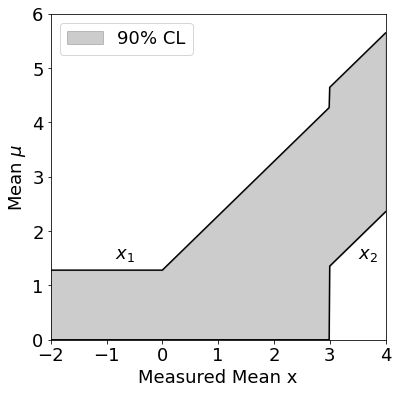

In [6]:
# Fig. 4

std = 1
alpha = 0.9


ymin, ymax = 0, 6
mean = np.linspace(ymin, ymax, 100)

lower_UL =  (1 - alpha)                               # lower limit for upper confidence intervals
x1_UL= norm.ppf(lower_UL, mean, std)                  # lower limit for x for upper confidence intervals

lower_central_CL =  0.5*(1 - alpha)                   # lower limit for central confidence intervals
upper_central_CL =  alpha + 0.5*(1 - alpha)           # upper limit for central confidence intervals
x1_central = norm.ppf(lower_central_CL, mean, std)    # lower limit of x for central confidence intervals
x2_central = norm.ppf(upper_central_CL, mean, std)    # upper limit of x for central confidence intervals

## selecting interval  based on flip-flopping

x1_FF = []                                            # x based on flip-flopping
mean1_FF = []                                         # mean1 based on flip-flopping 
mean2_FF = []                                         # mean1 based on flip-flopping 
for x in np.arange(-2, 4.01, 0.01):
    if x <= 0:                                        # For negative measurements, pretending it to be zero
        y1 = np.interp(0, x1_UL, mean)
        y2 = 0
        x1_FF.append(x)
        mean1_FF.append(y1)
        mean2_FF.append(y2)
        
    if (x >= 0) & (x <= 3):                           # For small signals, selecting upper confidence intervals
        y1 = np.interp(x, x1_UL, mean) 
        y2 = 0
        x1_FF.append(x)
        mean1_FF.append(y1)
        mean2_FF.append(y2)
        
    if (x >= 3):                                      # For large enough signals, selecting central confidence intervals
        x1_FF.append(x)
        y1 = np.interp(x, x1_central, mean) 
        y2 = np.interp(x, x2_central, mean) 
        mean1_FF.append(y1)
        mean2_FF.append(y2)
    
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x1_FF, mean1_FF, color='k')                  # upper bound for mean, based on flip-flopping
plt.plot(x1_FF, mean2_FF, color='k')                  # lower bound for mean, based on flip-flopping
plt.fill_between(                                     # Shading 90% confidence interval based on flip-flopping
        x= x1_FF, 
        y1= mean1_FF, 
        y2= mean2_FF,
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.text(-0.5, 1.5, r'$x_1$', horizontalalignment='right')
plt.text(3.5, 1.5, r'$x_2$', horizontalalignment='left')

plt.xlabel('Measured Mean x')
plt.ylabel(r'Mean $\mu$')
plt.xlim([-2, 4])
plt.ylim([0, 6])
plt.legend()
plt.show()

## Feldmann-Cousins confidence interval

For a particular $x$, we let $\mu_{\rm best}$ be the physically allowed value of $\mu$ for which $P(x|\mu)$ is maximum. For Gaussian distribution $\mu_{\rm best} = max(0, x)$, and

\begin{equation}
P(x|\mu_{\rm best}) = 
\begin{cases}
1/\sqrt{2\pi}, & x >0 \\
\exp{(-x^2/2)/\sqrt{2\pi}}, & x<0
\end{cases}
\end{equation}

We then compute $R$ 

\begin{equation}
R(x) = \frac{P(x|\mu)}{P(x|\mu_{\rm best})}
\end{equation}

During our Neymann construction of confidence intervals, the values of $x$ are added to the acceptance region at a particular value of $\mu$ in the decreasing order of $R$. In practice, this means that for a given value of $\mu$, one finds the interval $[x_1, x_2]$ such that $R(x_1) = R(x_2)$ and 

\begin{equation}
\int_{x_1}^{x_2} P(x|\mu) dx = \alpha
\end{equation}

We solve for $x_1$ and $x_2$ numerically to the desired precision, for each $\mu$ in a grid. With the acceptance regions all constructed, we then read off the confidence intervals $[\mu_1, \mu_2]$ for each $x_0$.

In [7]:
# defining a fuction to calculate FC confidence intervals [x_1, x_2] for a given mean

def FC_range(mean, std = 1, alpha = 0.9):
    
    dx = 0.01                                           # step size for x
    x_list = []
    R_list = []
    pdf_list = []
    for x in np.arange(mean - 5*std, mean + 5*std, dx):
        pdf = norm.pdf(x, mean, std)                    # probability distribution function at x for a given mean and sigma
        mean_best = max(0,x)                            # For Gaussian, the maximum pdf occur at this
        pdf_best = norm.pdf(x, mean_best, std)          # maximum probability distribution function at x_best
        R = pdf/pdf_best                                # Feldmann-Cousins ordering ratio
        x_list.append(x)
        R_list.append(R)
        pdf_list.append(pdf)

    df = pd.DataFrame({'x': x_list, 'P': pdf_list, 'R': R_list} ) 
    df_sorted = df.sort_values(by='R', ascending=False) # sorting the R in decreasing order

    x1, x2 = None, None
    
    # finding x_1 and x_2 for 90% CL where x with highest R are accepted first
    
    Prob_sum = 0                                          
    for index, row in df_sorted.iterrows():             # Loop index progresses in decreasing order of R  
        x = row["x"]
        P = row["P"]
        R = row["R"]
        Prob_sum += P*dx                                # integration over pdf
        if x <= mean :
            x1 = x                                      # lower CL
        else:
            x2 = x                                      # upper CL
        if Prob_sum >= alpha:                           # stop when total probability is equal to or 
            print(f'{mean:6.3f} {x1:6.3f} {x2:6.3f}')   # greater than desired CL
            break
            
    return x1, x2

In [8]:
# calculating FC confidence intervals [x_1, x_2] for a list of means

mean_list = []
FC_x_range = []

print(f'mean \t x1 \t x2')
for mean in np.arange(0, 6, 0.1):
    x_range = FC_range(mean)
    mean_list.append(mean)
    FC_x_range.append(list(x_range))

mean 	 x1 	 x2
 0.000 -3.410  1.280
 0.100 -4.900  1.380
 0.200 -3.990  1.480
 0.300 -2.620  1.590
 0.400 -2.010  1.730
 0.500 -1.650  1.880
 0.600 -1.400  2.020
 0.700 -1.190  2.170
 0.800 -1.020  2.310
 0.900 -0.860  2.440
 1.000 -0.730  2.570
 1.100 -0.600  2.690
 1.200 -0.480  2.810
 1.300 -0.370  2.920
 1.400 -0.250  3.030
 1.500 -0.140  3.140
 1.600 -0.040  3.240
 1.700  0.060  3.340
 1.800  0.160  3.440
 1.900  0.260  3.540
 2.000  0.360  3.640
 2.100  0.460  3.740
 2.200  0.560  3.840
 2.300  0.660  3.940
 2.400  0.760  4.040
 2.500  0.860  4.140
 2.600  0.960  4.240
 2.700  1.060  4.340
 2.800  1.160  4.440
 2.900  1.260  4.540
 3.000  1.360  4.640
 3.100  1.460  4.740
 3.200  1.560  4.840
 3.300  1.660  4.940
 3.400  1.760  5.040
 3.500  1.860  5.140
 3.600  1.960  5.240
 3.700  2.060  5.340
 3.800  2.160  5.440
 3.900  2.260  5.540
 4.000  2.360  5.640
 4.100  2.460  5.740
 4.200  2.560  5.840
 4.300  2.660  5.940
 4.400  2.760  6.040
 4.500  2.860  6.140
 4.600  2.960  6.24

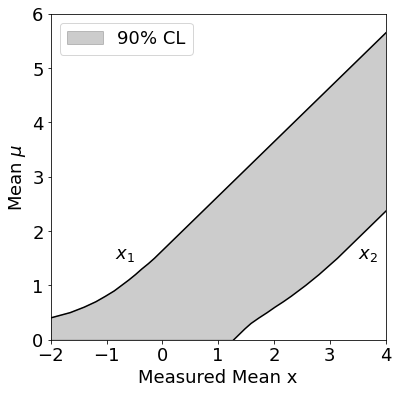

In [9]:
# plotting FC confidence intervals

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(np.array(FC_x_range)[:, 0], mean_list, color ='k')        # plotting x1 for FC confidence interval
plt.plot(np.array(FC_x_range)[:, 1], mean_list, color ='k')        # plotting x2 for FC confidence interval

plt.fill_between(                                                  # shading 90% confidence interval
        x= np.array(FC_x_range)[:, 0], 
        y1= mean_list, 
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.fill_between(                                                  # shading 90% confidence interval                           
        x= np.array(FC_x_range)[:, 1], 
        y1= mean_list, 
        color= "w",
        alpha= 1,
)

plt.text(-0.5, 1.5, r'$x_1$', horizontalalignment='right')
plt.text(3.5, 1.5, r'$x_2$', horizontalalignment='left')

plt.xlabel('Measured Mean x')
plt.ylabel(r'Mean $\mu$')
plt.xlim([-2, 4])
plt.ylim([0, 6])
plt.legend()
plt.show()

In [10]:
# calculating FC confidence intervals [\mu_1, \mu_2] for a list of measured x_0 (same as in Table X)

x0_list = np.arange(-3, 3.1, 0.1)
mu1_list = np.interp(x0_list, np.array(FC_x_range)[:, 1], mean_list) 
mu2_list = np.interp(x0_list, np.array(FC_x_range)[:, 0], mean_list)

print('x0 \t mu1 \t mu2')
for (x0, mu1, mu2) in zip(x0_list, mu1_list, mu2_list):
    print(f'{x0: 5.2f} {mu1: 5.2f} {mu2: 5.2f}')

x0 	 mu1 	 mu2
-3.00  0.00  0.27
-2.90  0.00  0.28
-2.80  0.00  0.29
-2.70  0.00  0.29
-2.60  0.00  0.30
-2.50  0.00  0.32
-2.40  0.00  0.34
-2.30  0.00  0.35
-2.20  0.00  0.37
-2.10  0.00  0.39
-2.00  0.00  0.40
-1.90  0.00  0.43
-1.80  0.00  0.46
-1.70  0.00  0.49
-1.60  0.00  0.52
-1.50  0.00  0.56
-1.40  0.00  0.60
-1.30  0.00  0.65
-1.20  0.00  0.70
-1.10  0.00  0.75
-1.00  0.00  0.81
-0.90  0.00  0.88
-0.80  0.00  0.95
-0.70  0.00  1.02
-0.60  0.00  1.10
-0.50  0.00  1.18
-0.40  0.00  1.27
-0.30  0.00  1.36
-0.20  0.00  1.45
-0.10  0.00  1.54
 0.00  0.00  1.64
 0.10  0.00  1.74
 0.20  0.00  1.84
 0.30  0.00  1.94
 0.40  0.00  2.04
 0.50  0.00  2.14
 0.60  0.00  2.24
 0.70  0.00  2.34
 0.80  0.00  2.44
 0.90  0.00  2.54
 1.00  0.00  2.64
 1.10  0.00  2.74
 1.20  0.00  2.84
 1.30  0.02  2.94
 1.40  0.12  3.04
 1.50  0.22  3.14
 1.60  0.31  3.24
 1.70  0.38  3.34
 1.80  0.45  3.44
 1.90  0.51  3.54
 2.00  0.59  3.64
 2.10  0.65  3.74
 2.20  0.72  3.84
 2.30  0.79  3.94
 2.40  0.87  

## Feldmann-Cousins intervals using Toy Monte Carlo method

### Example: Gaussian with Boundary at Origin

Ref.: Feldman-Cousins Confidence Levels - Toy MC Method, Till Moritz Karbach, [arXiv:1109.0714](https://arxiv.org/abs/1109.0714v1)

The method is based on toy Monte Carlo (MC) experiments, which are datasets drawn from the assumed pdf. Here, we shall use it to compute the confidence belt for the trivial example of a unit Gaussian bound to positive values, $\mu > 0$.

Feldmann-Cousins method uses ratio of likelihood: 

\begin{equation}
R(x, \mu) = \frac{P(x|\mu)}{P(x|\mu_{\rm best})}
\end{equation}

In pratice, it is convenient to take the logarithm of the likelihood ratio 

\begin{align}
-2\ln{R} \equiv \Delta \chi^2 &= \chi^2 - \chi^2_{\rm best}\\
&= \chi^2(x,\mu) - \chi^2(x, \mu_{\rm best}),
\end{align}

because one often prefers to minimize $-2\ln{R}$ rather than to maximize $P$. The algorithm to contruct FC intervals is as following:

- At the considered value of the true parameter $\mu_0$, generate a toy experiment by drawing a value of $x_{\rm toy}$ from the pdf. That is, draw from the unit Gaussian $G(\sigma = 1, \mu = \mu_0)$.
- Compute $\Delta\chi^2_{\rm toy}$ for the toy experiment. For $\chi^2(x,\mu)$, $x$ is set to $x_{\rm toy}$ and $\mu$ is set to $\mu_0$. For $\chi^2(x,\mu_{\rm best})$, $x = x_{\rm toy}$ and $\mu_{\rm best} = max(0, x_{\rm toy})$ implementing the boundary at zero. 
- Find the value $\Delta \chi^2_c$, such that $\alpha$ of the toy experiment have $\Delta\chi^2_{\rm toy} < \Delta \chi^2_c$.
- The interval $[x_1, x_2]$ is given by all values of $x$ such that $\Delta\chi^2(x,\mu_0) < \Delta\chi^2_c$.

In [11]:
def get_FC_x_range(mean):
    std = 1                                            # sigma of Gaussian pdf
    alpha = 0.9                                        # 90% CL
    total_events = 10000                               # Total number of pseudo experiments
    
    x_toy = norm.rvs(mean, std , size = total_events)  # Randomly generated events following Gaussian distribution

    P = norm.pdf(x_toy, mean,std)                      # P(x|u) = P(x_toy | u)
    chi2 = -2*np.log(P)                                # converting P(x|u) to chi^2(x,u)

    mean_best = np.maximum(np.zeros(len(x_toy)), x_toy)# calculating the best mean [max(0,x_toy)] for which P(x|u) is maximum
    P_best = norm.pdf(x_toy, mean_best, std)           # maximum pdf = P(x_toy|u_best)
    chi2_best = -2*np.log(P_best)                      # converting P(x_toy|u_best) to chi^2(x_toy,u_best)

    delta_chi2 = chi2 - chi2_best                      # Delta_chisq = chi^2(x_toy,u) - chi^2(x_toy,u_best)

    df = pd.DataFrame({'x_toy': x_toy, 'delta_chi2': delta_chi2} ) 
    df_sorted_delta_chi2 = df.sort_values(by='delta_chi2') # sorting the delta_chi2 in increasing order
    
    # finding x_1 and x_2 for 90% CL where x with highest R are accepted first
    
    count = 0                                          
    for index, row in df_sorted_delta_chi2.iterrows():  # Loop index progresses in increasing order of delta_chi2  
        x = row["x_toy"]
        d = row["delta_chi2"]
        count += 1                                      # integration over pdf
        if x <= mean :
            x1 = x                                      # lower CL
        else:
            x2 = x                                      # upper CL
        if count/total_events >= alpha:                 # stop when total probability is equal to or 
            print(f'u = {mean:6.3f}, x1 = {x1:6.3f}, x2 = {x2:6.3f}, delta_chi2_c = {d:6.3f}')   # greater than desired CL
            break

    return x1, x2, d, df_sorted_delta_chi2

### Toy experiment with Gaussian pdf

- Distribution of $x_{\rm toy}$ for Gaussian pdf $G(\sigma = 1, \mu = \mu_0)$ with $\mu_0 = 0.5$.
- Solid blue curve showing likelihood ratio in terms of $\Delta\chi^2$ as a function $x_{\rm toy}$
- Dashed blue curve showing $\Delta\chi^2_c$ at 90% CL
- The intersection of solid and dashed curve gives $x_1$ and $x_2$.

u =  0.500, x1 = -1.629, x2 =  1.871, delta_chi2_c =  1.880


(0.0, 14.688740025570441)

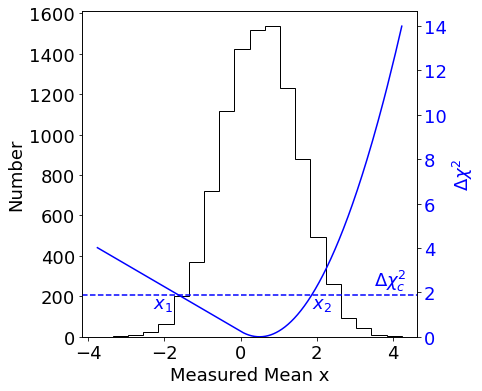

In [12]:
mean = 0.5
x1, x2, delta_chi2_c, df_toy = get_FC_x_range(mean)        # Toy experiment based on Gaussian pdf with mean = 0.5

fig, ax1 = plt.subplots(figsize=(6, 6))

x_ = ax1.hist(df_toy["x_toy"], bins = 20, histtype='step', color = 'k') # Histogram of x_toy
ax1.set_ylabel("Number")
ax1.set_xlabel("Measured Mean x")


df_sorted_x_toy = df_toy.sort_values(by='x_toy')           # Sorting with increasing x_toy for plotting smooth curve

ax2 = ax1.twinx()
color = 'b'
ax2.plot(df_sorted_x_toy["x_toy"], df_sorted_x_toy["delta_chi2"] , color = color) # plot delta_chi2 as a function of x_toy
ax2.axhline(delta_chi2_c, color = color, linestyle='--')   # plot delta_chi2 at 90 %CK
ax2.text(3.5, 2.3, r'$\Delta\chi^2_c$', color=color) 

ax2.text(1.1*x1, delta_chi2_c, r'$x_1$', horizontalalignment='right', verticalalignment="top", color = color)
ax2.text(x2, delta_chi2_c, r'$x_2$', horizontalalignment='left', verticalalignment="top", color = color)

ax2.set_ylabel(r'$\Delta\chi^2$', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)


In [13]:
mean_list = np.arange(0.1, 6, 0.1)
FC_x_range = []
for u in mean_list:
    x1, x2, _, _ = get_FC_x_range(u)
    FC_x_range.append([x1, x2])

u =  0.100, x1 = -3.908, x2 =  1.396, delta_chi2_c =  1.680
u =  0.200, x1 = -3.542, x2 =  1.469, delta_chi2_c =  1.611
u =  0.300, x1 = -2.653, x2 =  1.599, delta_chi2_c =  1.688
u =  0.400, x1 = -2.101, x2 =  1.757, delta_chi2_c =  1.841
u =  0.500, x1 = -1.658, x2 =  1.882, delta_chi2_c =  1.911
u =  0.600, x1 = -1.359, x2 =  2.012, delta_chi2_c =  1.993
u =  0.700, x1 = -1.185, x2 =  2.166, delta_chi2_c =  2.150
u =  0.800, x1 = -1.045, x2 =  2.320, delta_chi2_c =  2.311
u =  0.900, x1 = -0.926, x2 =  2.474, delta_chi2_c =  2.478
u =  1.000, x1 = -0.744, x2 =  2.577, delta_chi2_c =  2.488
u =  1.100, x1 = -0.615, x2 =  2.694, delta_chi2_c =  2.562
u =  1.200, x1 = -0.456, x2 =  2.793, delta_chi2_c =  2.537
u =  1.300, x1 = -0.347, x2 =  2.913, delta_chi2_c =  2.601
u =  1.400, x1 = -0.247, x2 =  3.027, delta_chi2_c =  2.651
u =  1.500, x1 = -0.159, x2 =  3.151, delta_chi2_c =  2.727
u =  1.600, x1 = -0.028, x2 =  3.230, delta_chi2_c =  2.657
u =  1.700, x1 =  0.057, x2 =  3.346, de

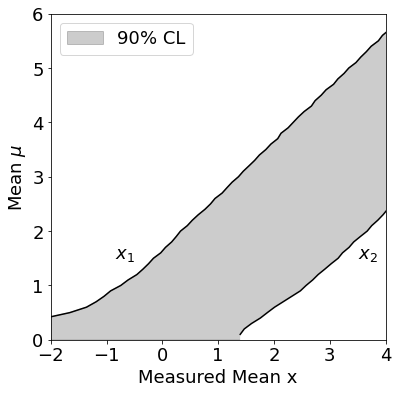

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(np.array(FC_x_range)[:, 0], mean_list, color = 'k')       # plotting x1 for FC confidence interval
plt.plot(np.array(FC_x_range)[:, 1], mean_list, color = 'k')       # plotting x2 for FC confidence interval
plt.fill_between(                                                  # shading 90% confidence interval
        x= np.array(FC_x_range)[:, 0], 
        y1= mean_list, 
        color= "k",
        alpha= 0.2,
        label = "90% CL")

plt.fill_between(                                                  # shading 90% confidence interval                           
        x= np.array(FC_x_range)[:, 1], 
        y1= mean_list, 
        color= "w",
        alpha= 1,
)

plt.text(-0.5, 1.5, r'$x_1$', horizontalalignment='right')
plt.text(3.5, 1.5, r'$x_2$', horizontalalignment='left')

plt.xlabel('Measured Mean x')
plt.ylabel(r'Mean $\mu$')
plt.xlim([-2, 4])
plt.ylim([0, 6])
plt.legend()
plt.show()